# News Category Dataset 

In [1]:
import pandas as pd 
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
import os 
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
df= pd.read_json(r'News_Category_Dataset_v2.json',lines=True)

In [3]:
df.head(5)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


### Exploratory Analysis: 

In [4]:
df.loc[lambda df: df['category'] == 'IMPACT']

,category,headline,authors,link,short_description,date
12,IMPACT,"With Its Way Of Life At Risk, This Remote Oyst...",Karen Pinchin,https://www.huffingtonpost.com/entry/remote-oy...,The revolution is coming to rural New Brunswick.,2018-05-26
66,IMPACT,Monsanto And Bayer Are Set To Merge. Here's Wh...,"Arthur Neslen, On Assignment For HuffPost",https://www.huffingtonpost.com/entry/monsanto-...,“Together they will influence markets all over...,2018-05-25
125,IMPACT,You're Going To Use That Self-Checkout Machine...,Dave Jamieson,https://www.huffingtonpost.com/entry/youre-goi...,"We may not realize it, but retailers are condi...",2018-05-24
193,IMPACT,Machines Don't Always Steal Our Jobs. Increasi...,"Mark Harris, On assignment for HuffPost",https://www.huffingtonpost.com/entry/jobs-robo...,Your next boss could be an algorithm,2018-05-23
286,IMPACT,She Started A Suicide Prevention Site At Age 1...,Lauren Rearick,https://www.huffingtonpost.com/entry/buddy-pro...,“People didn’t view me seriously because I was...,2018-05-21
...,...,...,...,...,...,...
200762,IMPACT,"Texana Hollis, 101-Year-Old Evicted Detroit Wo...",,https://www.huffingtonpost.com/entry/texana-ho...,A local contracting company offered to install...,2012-01-29
200763,IMPACT,"Malaria's Defeat, Africa's Future","Ellen Johnson-Sirleaf, Contributor\nPresident ...",https://www.huffingtonpost.com/entry/malarias-...,Africa is taking command of its future by tack...,2012-01-29
200825,IMPACT,Tinker and Change the World,"Larry Bock, Contributor\nFounder and Organizer...",https://www.huffingtonpost.com/entry/hands-on-...,"Tinkering -- that hands-on, garage-based tradi...",2012-01-28
200826,IMPACT,Pregnant and Displaced: Double the Danger,"Sarah Costa, Contributor\nExecutive Director o...",https://www.huffingtonpost.com/entry/maternal-...,It's time we all step up our efforts to ensure...,2012-01-28


In [5]:
df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [6]:
df['category'].nunique()

41

In [7]:
df['authors'].unique()

array(['Melissa Jeltsen', 'Andy McDonald', 'Ron Dicker', ...,
       'Courtney Garcia, Contributor\nI tell stories and drink wine.',
       'Mateo Gutierrez, Contributor\nArtist',
       'John Giacobbi, Contributor\nTales from the Interweb by The Web Sheriff'],
      dtype=object)

In [8]:
df['authors'].nunique()

27993

In [9]:
df.shape

(200853, 6)

In [10]:
df.isna().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

Text(0.5, 1.0, 'News Categories')

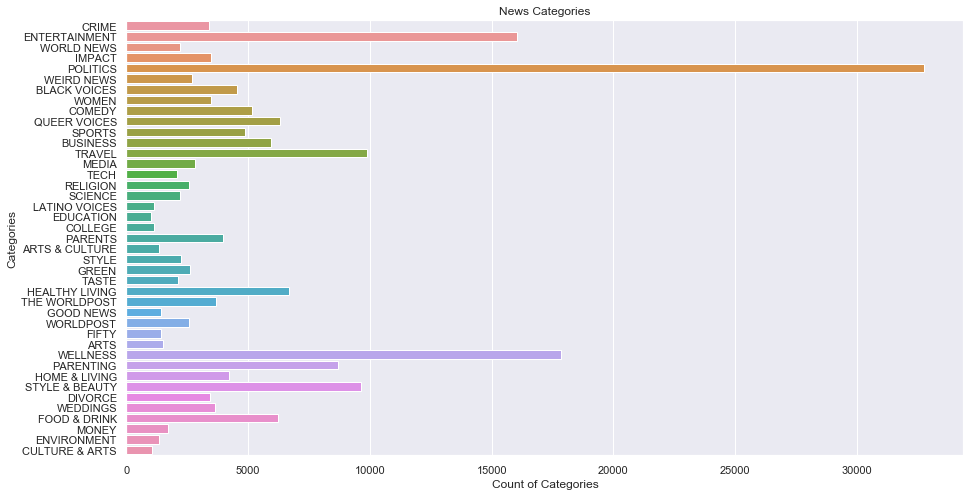

In [11]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
ax = sns.countplot(y="category", data=df)
plt.xlabel('Count of Categories')
plt.ylabel('Categories')
plt.title('News Categories')

Text(0.5, 1.0, 'Top 10 Authors (Written Articles)')

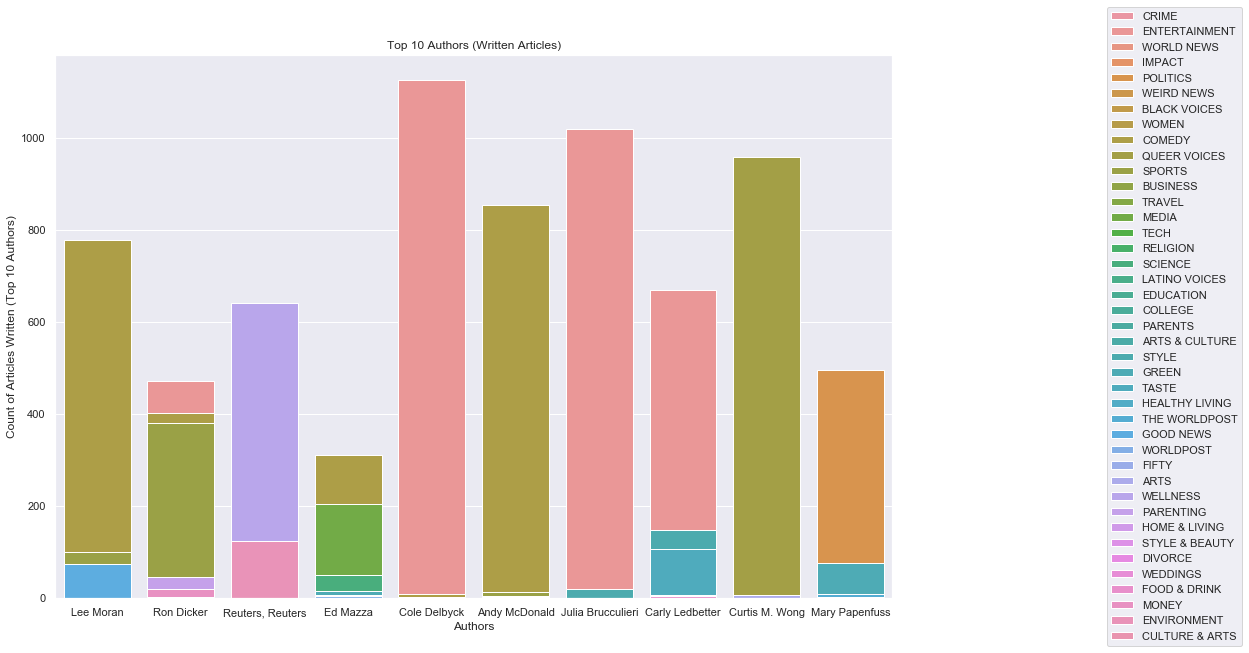

In [50]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
p = (sns.countplot(data=df, x = df['authors'],
                  order=df.authors.value_counts().iloc[1:11].index, hue = 'category', dodge = False))
p.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xlabel('Authors')
plt.ylabel('Count of Articles Written (Top 10 Authors)')
plt.title('Top 10 Authors (Written Articles)')